In [198]:
#Preparando Frame
import pandas as pd 
import matplotlib.pyplot as plt

caminho_planilha = r'C:\Users\EUAX\Downloads\Base-Dados-Desafio-D&A-01.xlsx'
dados = pd.read_excel(caminho_planilha, sheet_name=['VENDAS','PRODUTOS'])
vendas_df = pd.DataFrame(dados['VENDAS'])
produto_df = pd.DataFrame(dados['PRODUTOS'])
frame = pd.merge(vendas_df, produto_df)
faixa = [0,20,30,40,50,60,float('inf')]
frame['FAIXA_ETARIA'] = pd.cut(frame['IDADE'],bins=faixa,right=False)
mapeamento_regioes = {'BAHIA': 'NORDESTE','PARANÁ': 'SUL','PARAÍBA': 'NORDESTE','RIO DE JANEIRO': 'SUDESTE','RIO GRANDE DO SUL': 'SUL','SANTA CATARINA': 'SUL','SÃO PAULO': 'SUDESTE'}
frame['REGIAO'] = frame['ESTADO'].map(mapeamento_regioes)
display(frame)



,CLIENTE,IDADE,ESTADO,PRODUTO,QUANTIDADE_VENDIDA,DATA,CATEGORIA,FAIXA_ETARIA,REGIAO
0,1,47,SANTA CATARINA,A,64,2021-01-05,MAQUINA DE CORTAR GRAMA,"[40.0, 50.0)",SUL
1,2,61,SÃO PAULO,A,302,2021-02-24,MAQUINA DE CORTAR GRAMA,"[60.0, inf)",SUDESTE
2,3,26,BAHIA,A,42,2021-05-05,MAQUINA DE CORTAR GRAMA,"[20.0, 30.0)",NORDESTE
3,4,43,PARANÁ,A,446,2021-08-13,MAQUINA DE CORTAR GRAMA,"[40.0, 50.0)",SUL
4,5,20,RIO GRANDE DO SUL,A,482,2021-09-02,MAQUINA DE CORTAR GRAMA,"[20.0, 30.0)",SUL
5,7,43,PARAÍBA,A,257,2021-01-05,MAQUINA DE CORTAR GRAMA,"[40.0, 50.0)",NORDESTE
6,8,47,PARAÍBA,A,257,2021-03-16,MAQUINA DE CORTAR GRAMA,"[40.0, 50.0)",NORDESTE
7,1,47,SANTA CATARINA,B,488,2021-01-15,MANGUEIRAS,"[40.0, 50.0)",SUL
8,2,61,SÃO PAULO,B,117,2021-03-06,MANGUEIRAS,"[60.0, inf)",SUDESTE
9,3,26,BAHIA,B,403,2021-05-15,MANGUEIRAS,"[20.0, 30.0)",NORDESTE


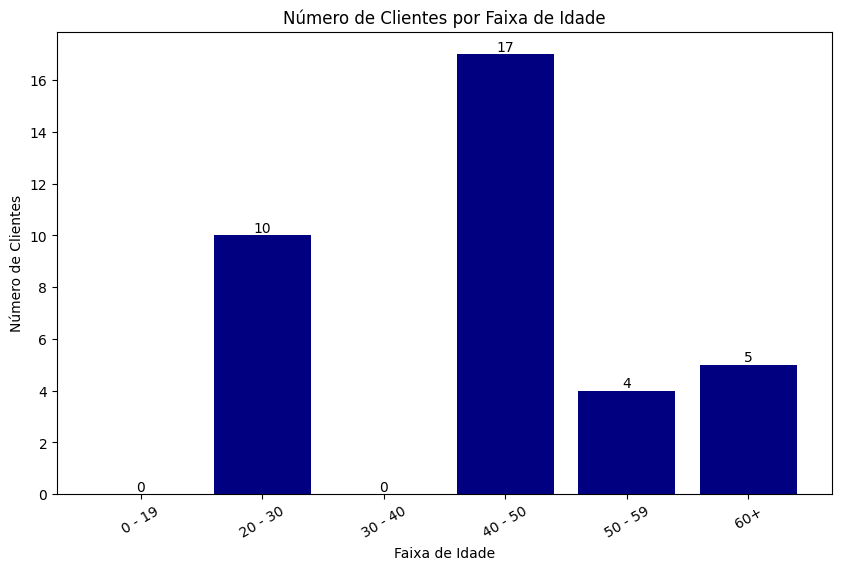

In [229]:
# Qual é o perfil demográfico dos clientes da empresa XYZ?
# Clientes faixa Etaria

import matplotlib.pyplot as plt

# Contagem de clientes por faixa etária
contagem_faixa = frame['FAIXA_ETARIA'].value_counts().sort_index()

#Criando faixas
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['0 - 19', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60+'], contagem_faixa, color ='navy')

# Adicionando rótulos e título
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=10, color='black')
ax.set_xlabel('Faixa de Idade')
ax.set_ylabel('Número de Clientes')
ax.set_title('Número de Clientes por Faixa de Idade')
plt.xticks(rotation=30)
plt.show()



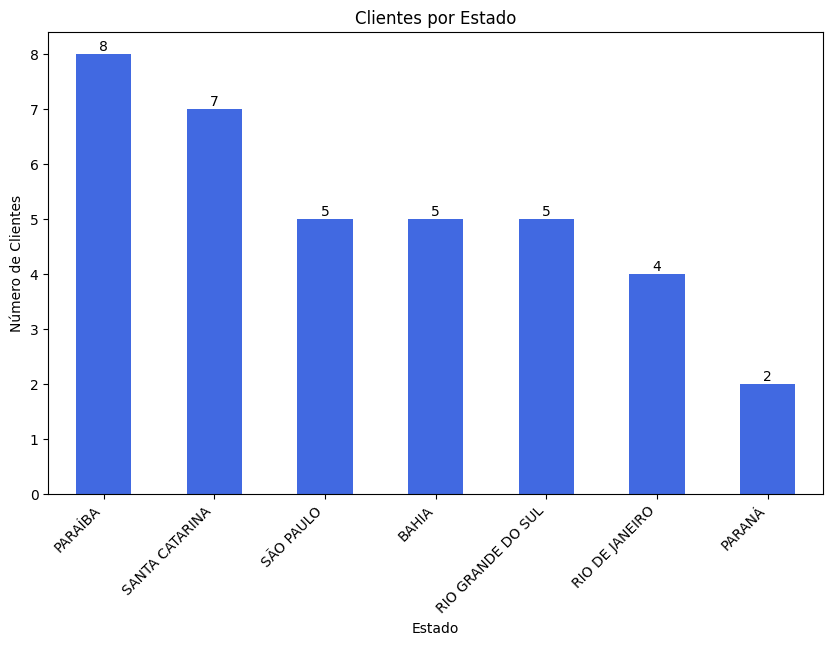

In [172]:
#Qual é o perfil demográfico dos clientes da empresa XYZ?
#Clientes por estado
import pandas as pd 
import matplotlib.pyplot as plt

# Contagem de clientes por estado
contagem_estado = frame['ESTADO'].value_counts()

# gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_estado.plot(kind='bar', color='royalblue')

#Adicionando rótulos e título
plt.title('Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=10, color='black')

plt.show()



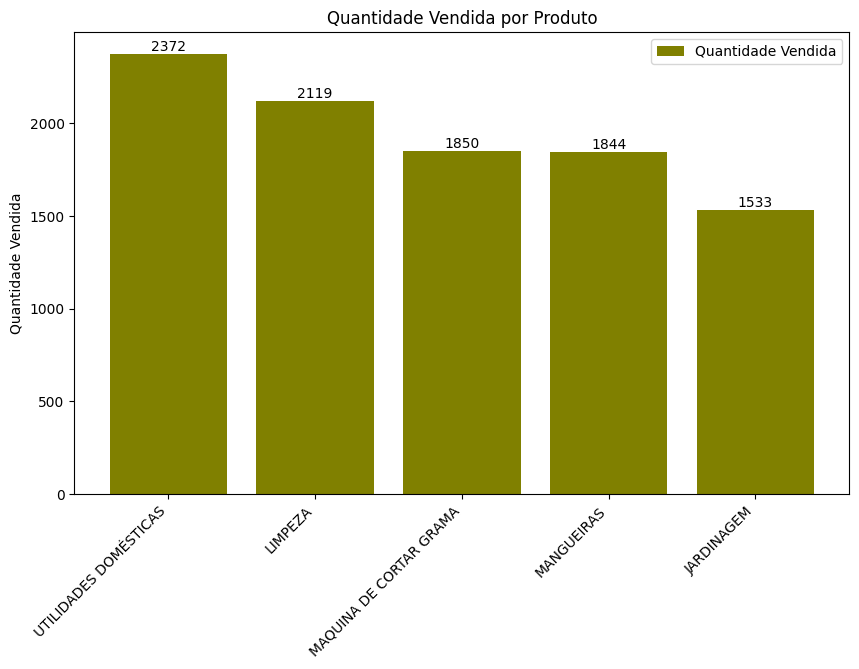

In [173]:
#Qual a categoria de produto mais vendidas e a menos vendidas?

import matplotlib.pyplot as plt

# Soma dos produtos por categoria
produto = frame[['CATEGORIA', 'QUANTIDADE_VENDIDA']].groupby('CATEGORIA').sum().reset_index()
produto = produto.sort_values(by=['QUANTIDADE_VENDIDA'], ascending=False)

# gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(produto.CATEGORIA, produto.QUANTIDADE_VENDIDA, color='olive', label='Quantidade Vendida')

# Adicionando rótulos e título
ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')
ax.set_ylabel('Quantidade Vendida')
ax.set_title('Quantidade Vendida por Produto')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.show()


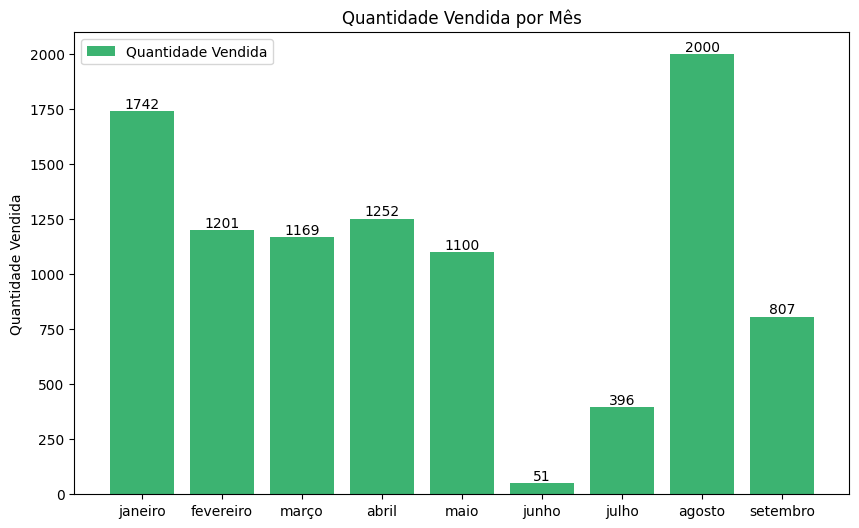

In [174]:
#Há alguma relação entre as vendas e a época do ano?
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import locale

# Meses no formato pt-br
locale.setlocale(locale.LC_TIME, 'pt_BR')

frame = frame.loc[:, ['DATA', 'QUANTIDADE_VENDIDA']]

# Extraindo meses
frame['mes'] = pd.DatetimeIndex(frame['DATA']).month

# Vendas por mes
soma_mes = frame.groupby('mes')['QUANTIDADE_VENDIDA'].sum()

# Trocando meses em numero por extenso 
soma_mes.index = soma_mes.index.map(lambda x: calendar.month_name[x])

# gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(soma_mes.index, soma_mes, color='mediumseagreen', label='Quantidade Vendida')

# Adicionar rótulos e título
ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')
ax.set_ylabel('Quantidade Vendida')
ax.set_title('Quantidade Vendida por Mês')
ax.legend()
plt.show()


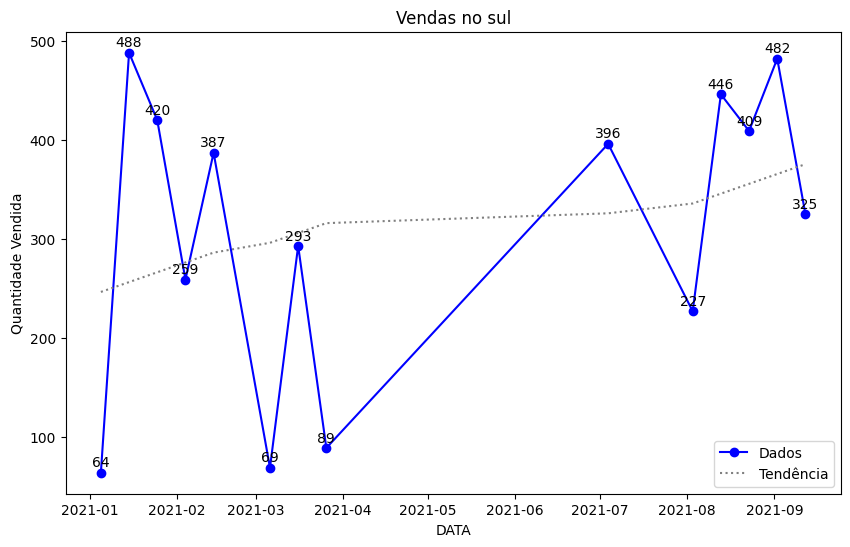

In [223]:
#Qual é a tendência de vendas por região geográfica?(sul)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filtrando apenas o Sul
df_sul = frame[frame['REGIAO'] == 'SUL']

def plot_sul(df_sul):
    df_sum = df_sul.groupby('DATA')['QUANTIDADE_VENDIDA'].sum().reset_index()

    plt.figure(figsize=(10, 6))

    #Colocando pontos nas linhas
    plt.plot(df_sum['DATA'], df_sum['QUANTIDADE_VENDIDA'], color='blue', marker='o', label='Dados')

    # linha de tendência
    slope, interception = np.polyfit(df_sum.index, df_sum['QUANTIDADE_VENDIDA'], 1)
    trendline = np.poly1d((slope, interception))
    plt.plot(df_sum['DATA'], trendline(df_sum.index), color='grey', linestyle=':', label='Tendência')
    
    # legendas
    plt.xlabel('DATA')
    plt.ylabel('Quantidade Vendida')
    plt.legend()

    # Colocando rotulo.
    for x, y in zip(df_sum['DATA'], df_sum['QUANTIDADE_VENDIDA']):
        plt.annotate(str(y), (x, y + 3), ha='center', va='bottom')

    plt.title('Vendas no sul')
    plt.show()
    
plot_sul(df_sul)


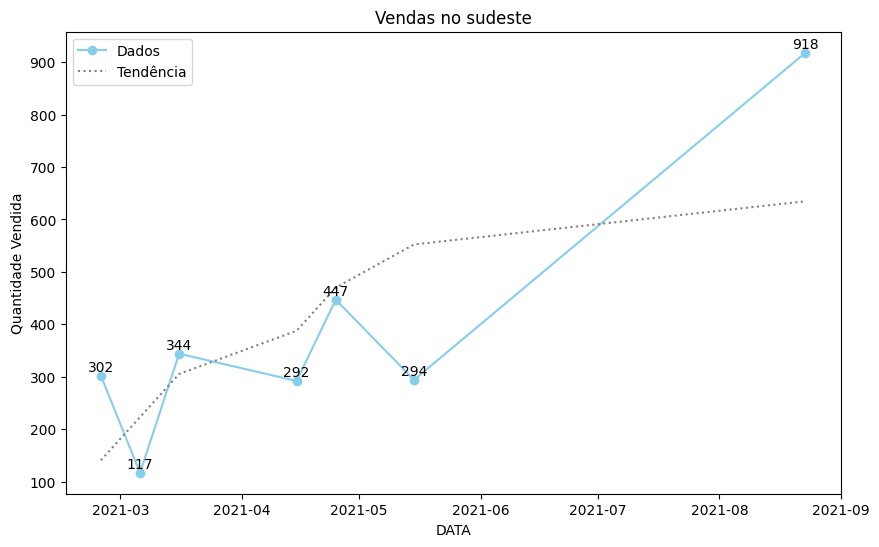

In [222]:
#Qual é a tendência de vendas por região geográfica?(sudeste)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_sudeste = frame[frame['REGIAO'] == 'SUDESTE']



def plot_sudeste(df_sudeste):
    df_sum = df_sudeste.groupby('DATA')['QUANTIDADE_VENDIDA'].sum().reset_index()

    plt.figure(figsize=(10, 6))

    # Colocando pontos nas linhas
    plt.plot(df_sum['DATA'], df_sum['QUANTIDADE_VENDIDA'], marker='o', label='Dados',color = 'skyblue')

    # linha de tendência
    slope, interception = np.polyfit(df_sum.index, df_sum['QUANTIDADE_VENDIDA'], 1)
    trendline = np.poly1d((slope, interception))
    plt.plot(df_sum['DATA'], trendline(df_sum.index), color='grey', linestyle=':', label='Tendência')
  
    #legendas
    plt.xlabel('DATA')
    plt.ylabel('Quantidade Vendida')
    plt.legend()

    # Colocando rotulo.
    for x, y in zip(df_sum['DATA'], df_sum['QUANTIDADE_VENDIDA']):
        plt.annotate(str(y), (x, y + 3), ha='center', va='bottom')

    plt.title('Vendas no sudeste')
    plt.show()
    
plot_sudeste(df_sudeste)

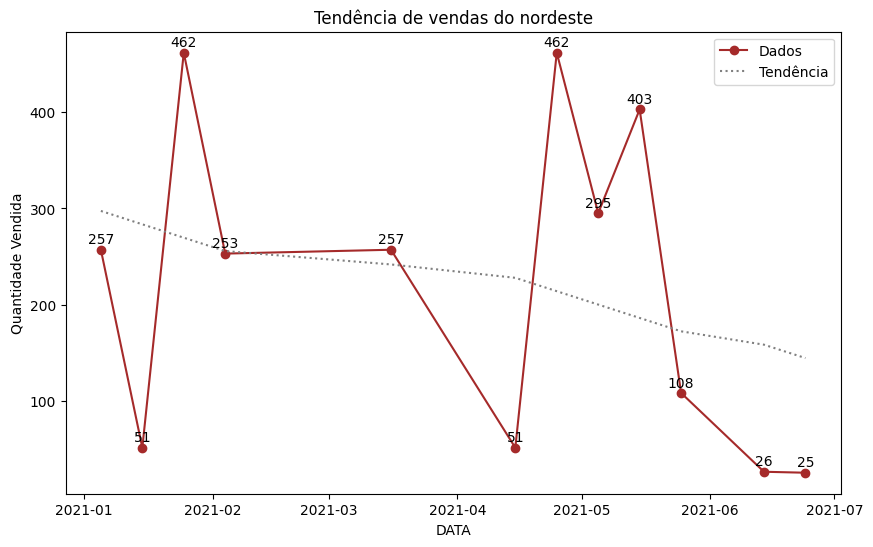

In [221]:
#Qual é a tendência de vendas por região geográfica?(Nordeste)
df_nordeste = frame[frame['REGIAO'] == 'NORDESTE']
def plot_nordeste(df_nordeste):
    df_sum = df_nordeste.groupby('DATA')['QUANTIDADE_VENDIDA'].sum().reset_index()

    plt.figure(figsize=(10, 6))

    # Colocando
    plt.plot(df_sum['DATA'], df_sum['QUANTIDADE_VENDIDA'], marker='o', label='Dados',color = 'brown')

    # inha de tendência
    slope, interception = np.polyfit(df_sum.index, df_sum['QUANTIDADE_VENDIDA'], 1)
    trendline = np.poly1d((slope, interception))
    plt.plot(df_sum['DATA'], trendline(df_sum.index), color='grey', linestyle=':', label='Tendência')
    
    #legendas
    plt.xlabel('DATA')
    plt.ylabel('Quantidade Vendida')
    plt.legend()

    # Colocando rotulo.
    for x, y in zip(df_sum['DATA'], df_sum['QUANTIDADE_VENDIDA']):
        plt.annotate(str(y), (x, y + 3), ha='center', va='bottom')

    plt.title('Vendas no nordeste')
    plt.show()
plot_nordeste(df_nordeste)

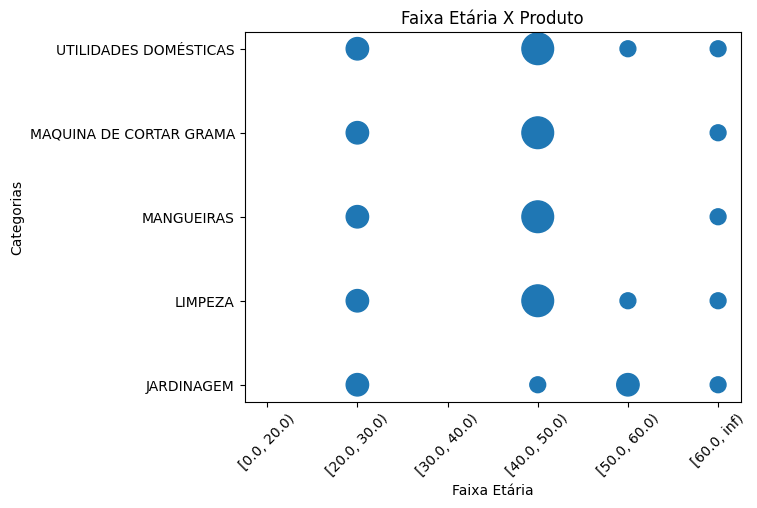

In [273]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supondo que você tenha um DataFrame chamado frame
frame_idade = frame[['CATEGORIA', 'FAIXA_ETARIA']]

# Contando o numero de relação
relacao = frame_idade.groupby(['FAIXA_ETARIA', 'CATEGORIA']).size().reset_index(name='Contagem')

# Criar o gráfico de dispersão
plt.scatter(relacao['FAIXA_ETARIA'].astype(str), relacao['CATEGORIA'], s=relacao['Contagem'] * 130)  

# Definir rótulos dos eixos
plt.xlabel('Faixa Etária')
plt.ylabel('Categorias')

# Definir título do gráfico
plt.title('Faixa Etária X Produto')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

